In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1) Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)**

In [ ]:
# Read Electronic data set
dfEle = pd.read_csv("/content/drive/My Drive/LablFiles/Electronic_dataset.csv")
dfEle.shape

(500000, 4)

In [ ]:
dfEle.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [ ]:
# Lets do some EDA, data check etc.

In [ ]:
dfEle.dtypes

user_id       object
prod_id       object
ratings      float64
timestamp      int64
dtype: object

In [ ]:
dfEle.isna().sum()

user_id      0
prod_id      0
ratings      0
timestamp    0
dtype: int64

In [ ]:
dfEle.isnull().sum()

user_id      0
prod_id      0
ratings      0
timestamp    0
dtype: int64

Insights
1) There is no need to rename any columns
2) The data set has no null values
3) Lets drop timestanp column as it is of no use

In [ ]:
dfEle.drop('timestamp', axis=1, inplace=True)

In [ ]:
dfEle['ratings'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: ratings, dtype: int64

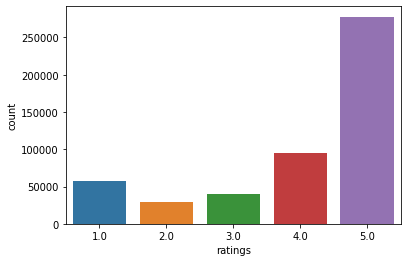

In [ ]:
sns.countplot(data=dfEle, x='ratings')

Insights
1) Out of 5 lac records, 2.77 lack records has 5 rating...i.e. more than 50% of the records have 5 rating

In [ ]:
len(dfEle['prod_id'].unique())

130138

In [ ]:
len(dfEle['user_id'].unique())

448368

Insights
1) There are 1,30,138 unique products
2) There are 4,48,368 unique user ids and so are users

**2) Build Popularity Recommender model.**

**Rule for popularity based model**
1) Products with high purchase count and rating will be considered more popular than less purchase count and less rating.

In [ ]:
dfProd_rat_count = pd.DataFrame(dfEle.groupby('prod_id')['ratings'].mean())

In [ ]:
dfProd_rat_count['PurchaseCount'] = pd.DataFrame(dfEle.groupby('prod_id')['ratings'].count())

In [ ]:
#The rating column in data set "dfProd_rat_count" is mean rating for given product id
#So lets rename column
dfProd_rat_count.rename(columns={"ratings": "MeanRating"}, inplace=True)

In [ ]:
dfProd_rat_count.sort_values(by='PurchaseCount', ascending=False).head()

,MeanRating,PurchaseCount
prod_id,,
B0074BW614,4.465729,1138
B00DR0PDNE,3.943327,1094
B007WTAJTO,4.417894,883
B0019EHU8G,4.740310,774
B006GWO5WK,4.275325,770


Lets create one feature called as "Populatiry" as below below rule
Popularity = Average Rating * PurchaseCount

In [ ]:
dfProd_rat_count['Popularity'] = dfProd_rat_count['MeanRating'] * dfProd_rat_count['PurchaseCount']

In [ ]:
dfProd_rat_count.sort_values(by='Popularity', ascending=False)

,MeanRating,PurchaseCount,Popularity
prod_id,,,
B0074BW614,4.465729,1138,5082.0
B00DR0PDNE,3.943327,1094,4314.0
B007WTAJTO,4.417894,883,3901.0
B0019EHU8G,4.740310,774,3669.0
B003ELYQGG,4.386928,765,3356.0
...,...,...,...
B003OBY7T2,1.000000,1,1.0
B003O7LR8A,1.000000,1,1.0
B003O6SKYA,1.000000,1,1.0


The above dataframe "dfProd_rat_count" is final result i.e. Popularity based model

Lets create a function which returns top 'n' products based on "Popularity" value

In [ ]:
def PopularEleProducts(n) :
  return dfProd_rat_count.sort_values(by='Popularity', ascending=False)[:n].index


In [ ]:
dfProd_rat_count.sort_values(by='Popularity', ascending=False)[:3].index

Index(['B0074BW614', 'B00DR0PDNE', 'B007WTAJTO'], dtype='object', name='prod_id')

In [ ]:
#Lets test it....get 5 products
PopularEleProducts(5)

Index(['B0074BW614', 'B00DR0PDNE', 'B007WTAJTO', 'B0019EHU8G', 'B003ELYQGG'], dtype='object', name='prod_id')

In [ ]:
#get 10 products
PopularEleProducts(10)

Index(['B0074BW614', 'B00DR0PDNE', 'B007WTAJTO', 'B0019EHU8G', 'B003ELYQGG',
       'B006GWO5WK', 'B003ES5ZUU', 'B007R5YDYA', 'B00622AG6S', 'B003LR7ME6'],
      dtype='object', name='prod_id')

**3) Split the data randomly into a train and test dataset. ( For example, split it in
70/30 ratio)**
**4) Build Collaborative Filtering model**

Transform data into surprise format

In [ ]:
!pip install surprise

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

In [ ]:
#initialise reader object
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(dfEle,reader)

#Lets split the data into 70-30 part
trainset, testset = train_test_split(data,test_size=0.3,random_state=150)

In [ ]:
#Lets build model using different methods

In [ ]:
#1) KNNwithMeans
from surprise import KNNWithMeans, accuracy, Prediction

In [ ]:
model = KNNWithMeans(k=60,sim_options={'name' : "pearson", 'user_based': False})

In [ ]:
#model.fit(trainset)

The session is getting crashed....may be due to huge data set and may be sparse data.
So lets select subset of entire data set to build model based on build hypothesis/logic
We should consider those users who have purchased 4 or more products (same or different ) and given rating...this is logical as a user who has purchased 1/2/3 product (i.e. 1 or 2 or 3 entries) and given rating will not help us to learn his/her behaviour and predict considering 130 K different products.

In [ ]:
dfElesubset = dfEle.groupby('user_id').filter(lambda x : len(x) >=4)

In [ ]:
#dfEle.groupby('user_id').count().sort_values(by='prod_id', ascending=False)
dfElesubset.shape

(14535, 3)

In [ ]:
data = Dataset.load_from_df(dfElesubset,reader)
#Lets split the data into 70-30 part
trainset, testset = train_test_split(data,test_size=0.3,random_state=150)
model = KNNWithMeans(k=60,sim_options={'name' : "pearson", 'user_based': True})

In [ ]:
model.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


**5) Evaluate the above model**

In [ ]:
#Evaluate test set
testPrediction = model.test(testset)
print(accuracy.rmse(testPrediction))

RMSE: 1.1744
1.174431213187713


In [ ]:
testPredictiondf = pd.DataFrame(testPrediction)

In [ ]:
testPredictiondf

,uid,iid,r_ui,est,details
0,A2FIC05DY3HT7J,B004UHD9JI,4.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
1,A3Q6ZPW60CVF2L,B0062EUE54,4.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
2,A84FLVDK2R5JF,B00EMHVVNM,5.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
3,A2QT3TUZKVW5ML,B000MX07GC,5.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
4,A72KEKIG7WATK,B000OYJ62U,4.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
...,...,...,...,...,...
4356,A2PNBEVAMV28R8,B000QW9DPU,2.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
4357,A15CL28ALB7MTZ,B001QFYCXO,4.0,3.800000,"{'actual_k': 0, 'was_impossible': False}"
4358,A18RZLFVFN6697,3744295508,5.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."
4359,A9M8R1LG51AZ4,B0002RBQO0,5.0,4.241596,"{'was_impossible': True, 'reason': 'User and/o..."


In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    1.1453  1.1254  1.1522  1.1151  1.1553  1.1231  1.2048  1.1501  1.1464  0.0262  
MAE (testset)     0.8587  0.8563  0.8661  0.8447  0.8764  0.8338  0.8954  0.8588  0.8613  0.0176  
Fit time          0.48  

{'fit_time': (0.47569775581359863,
  0.4168074131011963,
  0.3251326084136963,
  0.3419070243835449,
  0.4012415409088135,
  0.32981348037719727,
  0.3239407539367676,
  0.32375001907348633),
 'test_mae': array([0.85871628, 0.85627069, 0.86607972, 0.8447049 , 0.87641259,
        0.8337653 , 0.89537844, 0.85880602]),
 'test_rmse': array([1.14528478, 1.12539323, 1.15216628, 1.11509174, 1.15527849,
        1.12310157, 1.20483513, 1.15013484]),
 'test_time': (0.020168781280517578,
  0.02148151397705078,
  0.0212247371673584,
  0.02346348762512207,
  0.020468950271606445,
  0.030364990234375,
  0.024214982986450195,
  0.022243261337280273)}

In [ ]:
# Lets predict ratings for all pairs (user, product) that are NOT there in the training set
antitest = trainset.build_anti_testset()

In [ ]:
type(antitest)

list

In [ ]:
len(antitest)

22304034

In [ ]:
predict = model.test(antitest)

**6) Get top - K ( K = 5) recommendations. Since our goal is to recommend new
products to each user based on his/her habits, we will recommend 5 new
products**

In [ ]:
from collections import defaultdict

In [ ]:
#Lets define function which returns top 'n' recommendations
def GiveToRecommondation(predictions, n) :

  top = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    top[uid].append((iid, est))

  for uid, user_ratings in top.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top[uid] = user_ratings[:n]
  
  return top


In [ ]:
#Get top 5 ratings for users
top = GiveToRecommondation(predict,5)

for uid, user_ratings in top.items():
    print(uid, [iid for (iid, _) in user_ratings])

A4U27URFECK1U ['B006B1C88Y', 'B00CBQYD0O', 'B005DI2NWC', 'B001HX44A6', 'B00DOWCQB2']
A1R8RXVOGP7Q7C ['B007X3VC9A', 'B002QEBMAK', 'B004DUMQVY', 'B002V8C3W2', 'B005XCXY0S']
A2PICNZWHEINQC ['B009SYZ8OC', 'B006B1C88Y', 'B00CBQYD0O', 'B005DI2NWC', 'B001HX44A6']
A1A6UYFNC1L304 ['B0071NWYP8', 'B007X3VC9A', 'B004N85YBA', 'B002QEBMAK', 'B002V8C3W2']
A2JVISJC1V6GWB ['B007X3VC9A', 'B004N85YBA', 'B002QEBMAK', 'B004DUMQVY', 'B005XCXY0S']
AN1EG21Q0IYPI ['B007X3VC9A', 'B004N85YBA', 'B002QEBMAK', 'B004DUMQVY', 'B002V8C3W2']
A287VIG5J2SQTX ['B000A5TAT2', 'B006B1C88Y', 'B00CBQYD0O', 'B005DI2NWC', 'B001HX44A6']
A1AZQCVCDBQP6 ['B007X3VC9A', 'B004N85YBA', 'B002QEBMAK', 'B004DUMQVY', 'B002V8C3W2']
AOKS5JEGN6G ['B006B1C88Y', 'B00CBQYD0O', 'B005DI2NWC', 'B001HX44A6', 'B00DOWCQB2']
A1LQYV60D41177 ['B006B1C88Y', 'B005DI2NWC', 'B001HX44A6', 'B00DOWCQB2', 'B000BQYM0W']
ASYZ6ZMX0DFB5 ['B006B1C88Y', 'B00CBQYD0O', 'B005DI2NWC', 'B001HX44A6', 'B00DOWCQB2']
A1NA2JGI3GNDN2 ['B006B1C88Y', 'B00CBQYD0O', 'B005DI2NWC', 'B0

In [ ]:
#Let check with SVD model
from surprise import SVD
modelSVD = SVD(n_factors=100)
modelSVD.fit(trainset)
predictsvd = modelSVD.test(testset)
accuracy.rmse(predictsvd)

RMSE: 1.0787


1.078718841664378

In [ ]:
cross_validate(modelSVD, data, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
RMSE (testset)    1.0604  1.0870  1.0620  1.0830  1.1395  1.0695  1.0931  1.0831  1.0847  0.0235  
MAE (testset)     0.8115  0.8328  0.8265  0.8311  0.8566  0.8331  0.8408  0.8380  0.8338  0.0120  
Fit time          0.94    0.92    0.94    0.93    0.98    0.93    0.93    0.93    0.94    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'fit_time': (0.9354979991912842,
  0.9237298965454102,
  0.9439284801483154,
  0.9271903038024902,
  0.9780592918395996,
  0.9268331527709961,
  0.9335441589355469,
  0.9321670532226562),
 'test_mae': array([0.81148324, 0.83275093, 0.82646461, 0.83109199, 0.8565613 ,
        0.83312501, 0.84079292, 0.83798519]),
 'test_rmse': array([1.06036472, 1.08695826, 1.06199116, 1.08303842, 1.13948246,
        1.06952799, 1.09305262, 1.08311988]),
 'test_time': (0.012976408004760742,
  0.012862920761108398,
  0.012757539749145508,
  0.012579202651977539,
  0.013375520706176758,
  0.012499332427978516,
  0.012516498565673828,
  0.013812541961669922)}

**7) Summarise your insights**

Insights
*  The data set has no null values
*  Dropped timestanp column as it is of no use
*  Out of 5 lac records, 2.77 lack records has 5 rating...i.e. more than 50% of the records have 5 rating
*  There are 1,30,138 unique products
*  There are 4,48,368 unique user ids and so are users
*  Thus the data is sparse data set...more than 95 % of users have single entry  i.e. they have purchased only one item
*  The session is getting crashed if entire data set is used due to memory issue. This is due to huge and sparse data and limited memrory (google colab is providing 12 GB RAM still sessions i scrashing)
So subset of entire data set  is used to build model based on below hypothesis/logic
We should consider those users who have purchased 4 or more products (same or different ).
Intuitively this makes sense as a user who has purchased 1/2/3 product (i.e. 1 or 2 or 3 entries) will not help us to learn his/her behaviour and predict considering 130 K different products.
*  The SVD model gives less RMSE than KNNWithMeans model
